In [95]:
using LinearAlgebra
using Plots

include("IterativeMethods.jl")
include("KernelPlots.jl")
include("kernel_setup_script.jl")


kernel_setup_script.jl has set up the interpolation problem. 
 Interpolation matrix is k_Z and the corresponding x axis is Z The right hand side is f_z. 
 The interpolation matrix for plotting is k_YZ and the corresponding x axis is Y. 
 The direct solution to k_Z \ f_z is X_direct_solution.

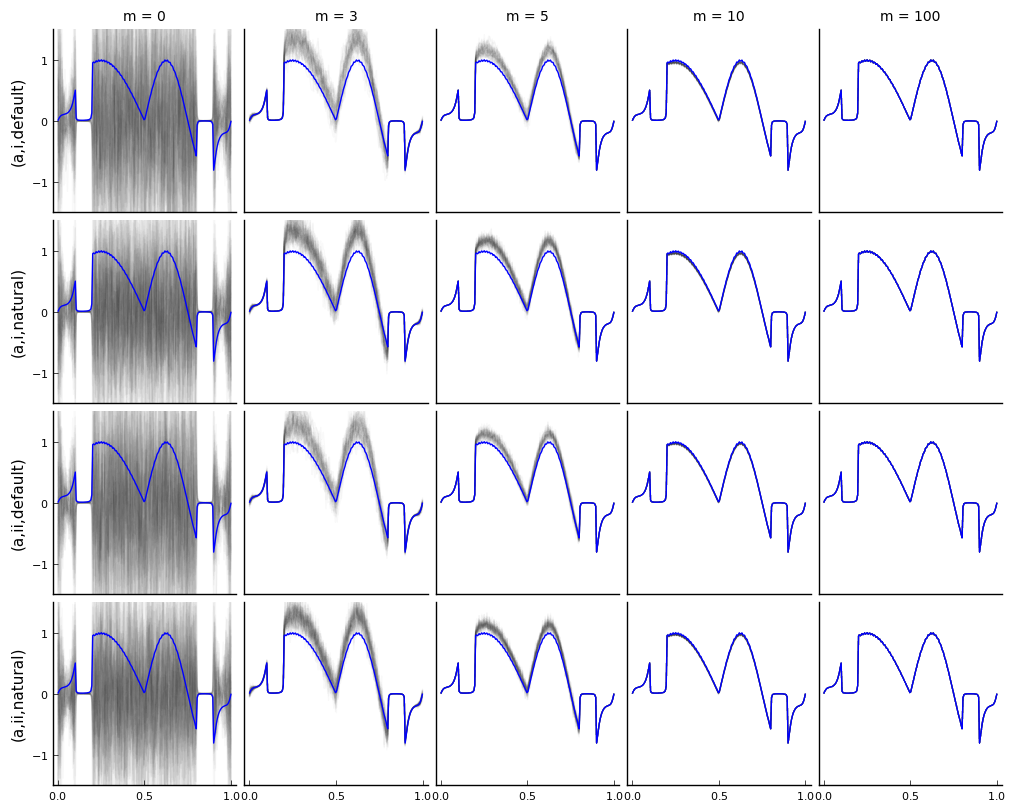

In [73]:
samples = 50

N = length(f_Z)
x0 = zeros(N)
default_prior = Diagonal(ones(N))
natural_prior = inv(k_Z)

R_default_opt(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Optimal)
R_natural_opt(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Optimal)
R_default(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,default_prior,i,2/3)
R_natural(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,natural_prior,i,2/3)

J_default_opt(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Optimal)
J_natural_opt(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Optimal)
J_default(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,default_prior,i,2/3)
J_natural(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,natural_prior,i,2/3)

"""
method_list = [R_default_opt,R_natural_opt,R_default,R_natural,J_default_opt,J_natural_opt,J_default,J_natural]
label_list = ["(a,i,default)","(a,i,natural)","(a,ii,default)","(a,ii,natural)",
"(b,i,default)","(b,i,natural)","(b,ii,default)","(b,ii,natural)"]
iters = [0,3,5,10,100]

"""

method_list = [R_default_opt,R_natural_opt,R_default,R_natural]
label_list = ["(a,i,default)","(a,i,natural)","(a,ii,default)","(a,ii,natural)"]
iters = [0,3,5,10,100]

R_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

#savefig(R_plots,"RichardsonPlots.pdf")


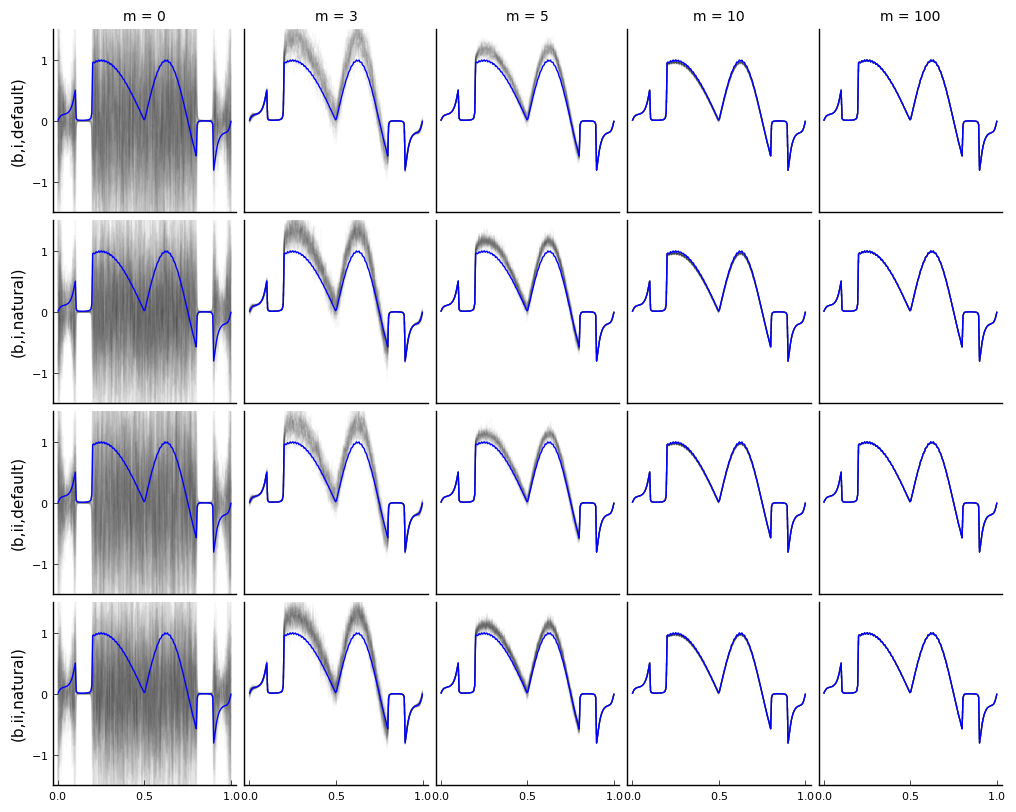

In [75]:
method_list = [J_default_opt,J_natural_opt,J_default,J_natural]
label_list = ["(b,i,default)","(b,i,natural)","(b,ii,default)","(b,ii,natural)"]
iters = [0,3,5,10,100]

J_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

#savefig(J_plots,"JacobiPlots.pdf")


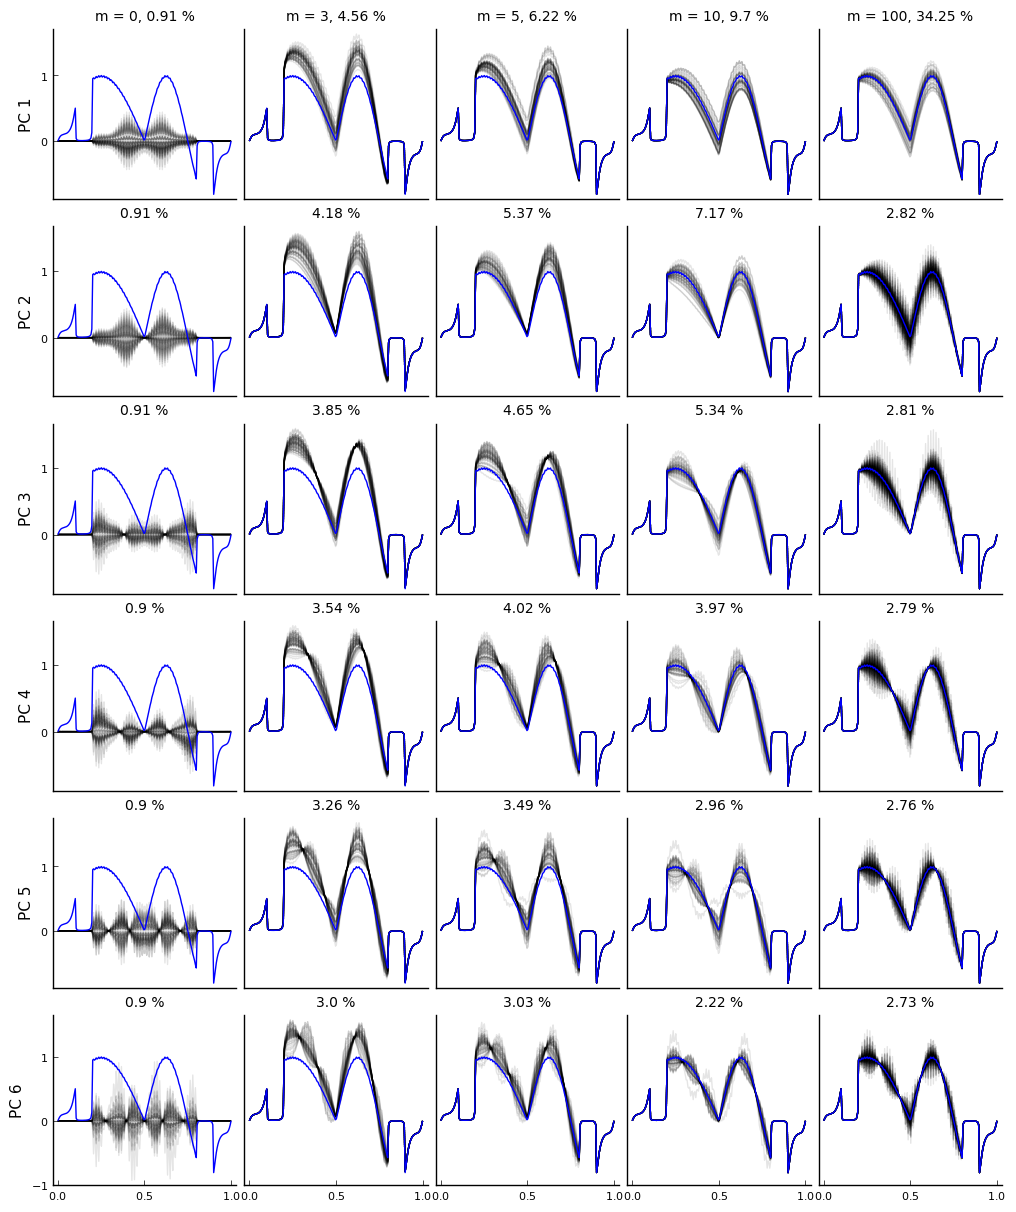

In [97]:
pc_plots = KernelPlots.pc_plots(J_natural_opt,iters,6,Y,k_YZ,X_direct_solution,samples)

#savefig(pc_plots,"PrincipalComponentPlots.pdf")
